#  Prospectivity mapping of Li pegmatites with 1-D CNNs and measures of  risk & return 


In [1]:
import pandas as pd 


pd.set_option('display.max_columns', None)  #  display all columns

In [2]:
cube=pd.read_csv("C:/Prospectivity_GitHub/cube.csv")

cube['cellid'] = cube['cellid'].str.replace('s2cellidis:', '') 

cube=cube.drop('Target', axis=1) 

** knowledge-guided variable selection**


In [3]:
#**spatial vectors that might be linked to Li pegmatite mineralization are selected herein:**

In [4]:
columns_to_select = [
    'Igneous_Intrusive_Felsic',
    'Igneous_Intrusive_Felsic_Felsite',
    'Igneous_Intrusive_Felsic_Pegmatite',
    'Igneous_Intrusive_Felsic_Tonalite',
    'Igneous_Intrusive_Intermediate',
    'Igneous_Intrusive_Mafic',
    'Igneous_Intrusive_Ultramafic',
    'Metamorphic_Amphibolite',
    'Metamorphic_Gneiss',
    'Metamorphic_Gneiss_Magmatic',
    'Metamorphic_Gneiss_Supracrustal',
    'Metamorphic_Granulite',
    'Metamorphic_Migmatite',
    'Metamorphic_Quartzite',
    'Metamorphic_Schist',
    'Sedimentary_Chemical',
    'Sedimentary_Chemical_Carbonate',
    'Sedimentary_Siliciclastic',
    'Period1_Cambrian',
    'Period1_Cretaceous',
    'Period1_Devonian',
    'Period1_Eoarchean',
    'Period1_Jurassic',
    'Period1_Mesoarchean',
    'Period1_Mesoproterozoic',
    'Period1_Mississippian',
    'Period1_Neoarchean',
    'Period1_Neogene',
    'Period1_Neoproterozoic',
    'Period1_Ordovician',
    'Period1_Paleoarchean',
    'Period1_Paleogene',
    'Period1_Paleoproterozoic',
    'Period1_Pennsylvanian',
    'Period1_Permian',
    'Period1_Silurian',
    'Period1_Triassic',
    'Period2_Cambrian',
    'Period2_Cretaceous',
    'Period2_Devonian',
    'Period2_Eoarchean',
    'Period2_Jurassic',
    'Period2_Mesoarchean',
    'Period2_Mesoproterozoic',
    'Period2_Mississippian',
    'Period2_Neoarchean',
    'Period2_Neogene',
    'Period2_Neoproterozoic',
    'Period2_Ordovician',
    'Period2_Paleoarchean',
    'Period2_Paleogene',
    'Period2_Paleoproterozoic',
    'Period2_Pennsylvanian',
    'Period2_Permian',
    'Period2_Silurian',
    'Period2_Triassic',
    'EON1Phanerozoic',
    'EON1Precambrian',
    'EON2Phanerozoic',
    'EON2Precambrian',
    'Era1Archean',
    'Era1Cenozoic',
    'Era1Mesozoic',
    'Era1Paleozoic',
    'Era1Proterozoic',
    'Era2_Archean',
    'Era2_Cenozoic',
    'Era2_Mesozoic',
    'Era2_Paleozoic',
    'Era2_Proterozoic',
    'Coarse clastic',
    'Fine clastic',
    'Calcareous',
    'Carbonaceous',
    'Sedimentary',
    'Ultramafic to mafic',
    'Intermediate',
    'Felsic',
    'Pegmatitic',
    'Schistose',
    'Gneissose',
    'Anatectic',
    'CratonicMargins',
    'GSC_Radiometrics_U',
    'GSC_Radiometrics_Th',
    'GSC_Radiometrics_K',
    'GSC_Gravity_1VD',
    'GSC_Gravity_Bouguer',
    'GSC_Gravity_HGM',
    'GSC_Gravity_Worms_5km_Proximity',
    'GSC_Gravity_Worms_10km_Proximity',
    'GSC_Gravity_Worms_15km_Proximity',
    'GSC_Gravity_Worms_20km_Proximity',
    'GSC_Gravity_Worms_25km_Proximity',
    'GSC_Gravity_Worms_30km_Proximity',
    'GSC_Magnetic_1VD',
    'GSC_Magnetic_HGM',
    'GSC_Magnetic_RTF',
    'GSC_Magnetic_Tilt',
    'GSC_Magnetic_Worms_5km_Proximity',
    'GSC_Magnetic_Worms_10km_Proximity',
    'GSC_Magnetic_Worms_15km_Proximity',
    'GSC_Magnetic_Worms_20km_Proximity',
    'GSC_Magnetic_Worms_25km_Proximity',
    'GSC_Magnetic_Worms_30km_Proximity',
    'McCafferty_Gravity_Bouguer',
    'McCafferty_Gravity_Bouguer_HGM',
    'McCafferty_Magnetic_1VD',
    'McCafferty_Magnetic_Deep_HGM',
    'McCafferty_Magnetic_RTP',
    'McCafferty_Magnetic_RTP_HGM'
]

In [5]:
predictors=pd.DataFrame()
predictors[columns_to_select]=cube[columns_to_select]

C:\Users\mparsasa\AppData\Local\Temp\ipykernel_29300\1094547175.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  predictors[columns_to_select]=cube[columns_to_select]
C:\Users\mparsasa\AppData\Local\Temp\ipykernel_29300\1094547175.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  predictors[columns_to_select]=cube[columns_to_select]
C:\Users\mparsasa\AppData\Local\Temp\ipykernel_29300\1094547175.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which 

In [8]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

predictors_nor = pd.DataFrame(scaler.fit_transform(predictors), columns=predictors.columns) 

**scaling the features**

In [6]:
#importing labels from a dbf file


from dbfread import DBF


path = 'C:/Prospectivity_GitHub/labelslct.dbf'
# Open the DBF file
#C:/Prospectivity_GitHub/labelslct.dbf
table = DBF(path, load=True)

# Convert to pandas DataFrame
labelscellid = pd.DataFrame(iter(table))

In [9]:
predictors_nor['cellid']=cube['cellid']

labelsall=pd.merge(predictors_nor, labelscellid, on='cellid', how='inner') 

labels = labelsall[labelsall['label'] == 1]


In [10]:
c_to_drop=['cellid', 'label']
labels=labels.drop(c_to_drop, axis=1)

**Feature selection**

In [11]:
# calculating the AUC values for features
import pandas as pd
from sklearn.metrics import roc_auc_score

# Assuming df is your DataFrame, and 'Target' is the name of the target column
target_column = 'Target'

# Create an empty dictionary to store AUC-ROC scores
auc_roc_scores = {}

# Loop through all columns except 'Target'
for column in labels.columns:
    if column != target_column:
        # Calculate AUC-ROC score for each variable with respect to 'Target'
        auc_roc = roc_auc_score(labels[target_column], labels[column])
        auc_roc_scores[column] = auc_roc

# Sort the AUC-ROC scores in descending order
sorted_auc_roc_scores = dict(sorted(auc_roc_scores.items(), key=lambda item: item[1], reverse=True))

# Display the sorted AUC-ROC scores
for column, score in sorted_auc_roc_scores.items():
    print(f"{column}: AUC-ROC = {score:.4f}")


Era2_Archean: AUC-ROC = 0.7887
Period2_Neoarchean: AUC-ROC = 0.7824
Era1Archean: AUC-ROC = 0.7788
EON2Precambrian: AUC-ROC = 0.7161
EON1Precambrian: AUC-ROC = 0.7091
Period1_Mesoarchean: AUC-ROC = 0.6261
McCafferty_Gravity_Bouguer_HGM: AUC-ROC = 0.6245
Schistose: AUC-ROC = 0.6188
Intermediate: AUC-ROC = 0.6097
Period1_Neoarchean: AUC-ROC = 0.6094
GSC_Radiometrics_U: AUC-ROC = 0.6042
Ultramafic to mafic: AUC-ROC = 0.5920
GSC_Gravity_HGM: AUC-ROC = 0.5879
GSC_Magnetic_HGM: AUC-ROC = 0.5763
Anatectic: AUC-ROC = 0.5480
GSC_Gravity_Worms_20km_Proximity: AUC-ROC = 0.5455
Period1_Paleoarchean: AUC-ROC = 0.5434
GSC_Radiometrics_K: AUC-ROC = 0.5258
Sedimentary: AUC-ROC = 0.5232
Coarse clastic: AUC-ROC = 0.5197
Igneous_Intrusive_Felsic_Tonalite: AUC-ROC = 0.5196
Metamorphic_Schist: AUC-ROC = 0.5177
GSC_Gravity_Worms_25km_Proximity: AUC-ROC = 0.5129
GSC_Magnetic_Worms_30km_Proximity: AUC-ROC = 0.5109
Felsic: AUC-ROC = 0.5101
Pegmatitic: AUC-ROC = 0.5070
Igneous_Intrusive_Felsic_Felsite: AUC-ROC =

In [12]:
# selcting the featurs with AUC values greater than 0.5


selected_columns = [
    'Era2_Archean',
    'Period2_Neoarchean',
    'Era1Archean',
    'EON2Precambrian',
    'EON1Precambrian',
    'Period1_Mesoarchean',
    'McCafferty_Gravity_Bouguer_HGM',
    'Schistose',
    'Intermediate',
    'Period1_Neoarchean',
    'GSC_Radiometrics_U',
    'Ultramafic to mafic',
    'GSC_Gravity_HGM',
    'GSC_Magnetic_HGM',
    'Anatectic',
    'GSC_Gravity_Worms_20km_Proximity',
    'Period1_Paleoarchean',
    'GSC_Radiometrics_K',
    'Sedimentary',
    'Coarse clastic',
    'Igneous_Intrusive_Felsic_Tonalite',
    'Metamorphic_Schist',
    'GSC_Gravity_Worms_25km_Proximity',
    'GSC_Magnetic_Worms_30km_Proximity',
    'Felsic',
    'Pegmatitic',
    'Igneous_Intrusive_Felsic_Felsite',
    'Period2_Mesoarchean',
    'Igneous_Intrusive_Ultramafic',
    'Period2_Mississippian',
    'Period2_Permian',
    'Metamorphic_Gneiss_Supracrustal',
    'Period2_Cambrian',
    'Sedimentary_Siliciclastic',
    'Igneous_Intrusive_Felsic_Pegmatite',
    'Metamorphic_Amphibolite',
    'Metamorphic_Granulite',
    'Period1_Eoarchean',
    'Period1_Mississippian',
    'Period1_Permian',
    'Period2_Eoarchean',
    'Period2_Paleoarchean'
]


labels_s=pd.DataFrame()
labels_s[selected_columns]=labels[selected_columns]
labels_s['Target']=labels['Target']

predictors_s=pd.DataFrame()
predictors_s[selected_columns]=predictors_nor[selected_columns]



In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from sklearn.metrics import roc_auc_score
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import roc_curve

# Separate predictors (X) and target variable (y)
X = labels_s.drop('Target', axis=1).values
y = labels_s['Target'].values

# Specific random states to run the loop
random_states = [1, 2, 3, 4, 5]

average_predictions = []  # To store average predictions
average_fpr = []  # To store average FPR
average_tpr = []  # To store average TPR
average_AUC= [] # To store average AUC

for random_state in random_states:
    print(f"Random State {random_state}:")

    # Split the data with the specified random state
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

    # Normalize the data
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Reshape input data for 1D CNN
    input_shape = (X_train.shape[1], 1)
    X_train_reshaped = X_train.reshape(-1, X_train.shape[1], 1)
    X_test_reshaped = X_test.reshape(-1, X_test.shape[1], 1)

    # Build and compile the model
    model = Sequential([
        Conv1D(filters=512, kernel_size=5, activation='relu', input_shape=input_shape),
        MaxPooling1D(pool_size=2),
        Flatten(),
        Dense(256, activation='relu'),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss='mean_squared_error')

    # Initialize EarlyStopping callback
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min', restore_best_weights=True)

    # Train the model
    model.fit(X_train_reshaped, y_train, epochs=1000, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

    # Evaluate the model on the test set
    loss = model.evaluate(X_test_reshaped, y_test)
    print("Test loss:", loss)

    # Predicting the test set
    test_probabilities = model.predict(X_test_reshaped)

    # Calculate the AUC score
    auc_score_test = roc_auc_score(y_test, test_probabilities)
    print("AUC Test:", auc_score_test)

    # Assuming you have 'allpredictors_normalized' as your new data
    new_X = predictors_s.values
    new_X_scaled = scaler.transform(new_X)
    new_X_reshaped = new_X_scaled.reshape(-1, new_X.shape[1], 1)
    predictions = model.predict(new_X_reshaped)

    # Calculate and store the average predictions
    average_predictions.append(predictions)

    # Calculate and store  average AUCs
    average_AUC.append(auc_score_test)

    fpr, tpr, _ = roc_curve(y_test, test_probabilities)

    # Interpolate ROC curve to create 100 entries
    interp_fpr = np.linspace(0, 1, 100)
    interp_tpr = np.interp(interp_fpr, fpr, tpr)

    # Store fpr and tpr in a pandas DataFrame
    roc_CNN = pd.DataFrame({'FPR': interp_fpr, 'TPR': interp_tpr})

    # Calculate and store average FPR and TPR
    if len(average_fpr) == 0:
        average_fpr = interp_fpr
        average_tpr = interp_tpr
    else:
        average_fpr += interp_fpr
        average_tpr += interp_tpr

# Calculate the final average FPR and TPR
average_fpr /= len(random_states)
average_tpr /= len(random_states)

# RETURN
rreturn = np.mean(average_predictions, axis=0)

# RISK
risk = np.std(average_predictions, axis=0)

# AVERAGE AUC 
aucav=np.mean(average_AUC, axis=0)
print("Average AUC Test:", aucav)


Random State 1:
Epoch 1/1000
6/6 [==============================] - 1s 32ms/step - loss: 0.1960 - val_loss: 0.1730
Epoch 2/1000
6/6 [==============================] - 0s 20ms/step - loss: 0.1412 - val_loss: 0.1563
Epoch 3/1000
6/6 [==============================] - 0s 19ms/step - loss: 0.1038 - val_loss: 0.1418
Epoch 4/1000
6/6 [==============================] - 0s 21ms/step - loss: 0.0884 - val_loss: 0.1411
Epoch 5/1000
6/6 [==============================] - 0s 20ms/step - loss: 0.0853 - val_loss: 0.1286
Epoch 6/1000
6/6 [==============================] - 0s 22ms/step - loss: 0.0664 - val_loss: 0.1211
Epoch 7/1000
6/6 [==============================] - 0s 19ms/step - loss: 0.0539 - val_loss: 0.1285
Epoch 8/1000
6/6 [==============================] - 0s 20ms/step - loss: 0.0467 - val_loss: 0.1048
Epoch 9/1000
6/6 [==============================] - 0s 20ms/step - loss: 0.0386 - val_loss: 0.1017
Epoch 10/1000
6/6 [==============================] - 0s 21ms/step - loss: 0.0305 - val_loss: 

6/6 [==============================] - 0s 19ms/step - loss: 0.1317 - val_loss: 0.0980
Epoch 4/1000
6/6 [==============================] - 0s 19ms/step - loss: 0.1122 - val_loss: 0.0870
Epoch 5/1000
6/6 [==============================] - 0s 20ms/step - loss: 0.1064 - val_loss: 0.0912
Epoch 6/1000
6/6 [==============================] - 0s 20ms/step - loss: 0.0772 - val_loss: 0.0876
Epoch 7/1000
6/6 [==============================] - 0s 20ms/step - loss: 0.0682 - val_loss: 0.1103
Epoch 8/1000
6/6 [==============================] - 0s 20ms/step - loss: 0.0732 - val_loss: 0.0849
Epoch 9/1000
6/6 [==============================] - 0s 22ms/step - loss: 0.0563 - val_loss: 0.0980
Epoch 10/1000
6/6 [==============================] - 0s 20ms/step - loss: 0.0433 - val_loss: 0.0869
Epoch 11/1000
6/6 [==============================] - 0s 20ms/step - loss: 0.0378 - val_loss: 0.1000
Epoch 12/1000
6/6 [==============================] - 0s 21ms/step - loss: 0.0226 - val_loss: 0.1043
Epoch 12: early stop

In [15]:
RET = pd.DataFrame(rreturn, columns=['return'])
RIS = pd.DataFrame(risk, columns=['risk'])
visualization=pd.DataFrame()
visualization['return']=RET['return']
visualization['risk']=RIS['risk']
visualization['cellid']=cube['cellid']
visualization['Easting']=cube['Easting']
visualization['Northing']=cube['Northing']

In [16]:
def classify(value, lower, upper):
    if value <= lower:
        return 'low'
    elif value <= upper:
        return 'medium'
    else:
        return 'high'


In [17]:
for column in visualization.columns[0:2]:  # Loop through the first two columns
    thresholds = visualization[column].quantile([0.33, 0.66])
    classified_column_name = column + '_classified'
    visualization[classified_column_name] = visualization[column].apply(lambda x: classify(x, thresholds[0.33], thresholds[0.66]))
    
visualization['Bplot'] = visualization.apply(lambda row: row['return_classified'] + ' ' + row['risk_classified'], axis=1)


In [18]:
#export to shp 

import geopandas as gpd
from shapely.geometry import Point



gdf = gpd.GeoDataFrame(visualization, geometry=[Point(xy) for xy in zip(visualization.Easting, visualization.Northing)])

gdf.crs = "EPSG:3979" #NAD83 

output_filename = 'C:/Prospectivity_GitHub/lct/vislct.shp'

gdf.to_file(output_filename, driver='ESRI Shapefile')




C:\Users\mparsasa\AppData\Local\Temp\ipykernel_29300\4007082475.py:14: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf.to_file(output_filename, driver='ESRI Shapefile')


**fitting rate**

In [19]:
frate=pd.DataFrame()
frate['return']=visualization['return']
frate['Target']=labelsall['Target']

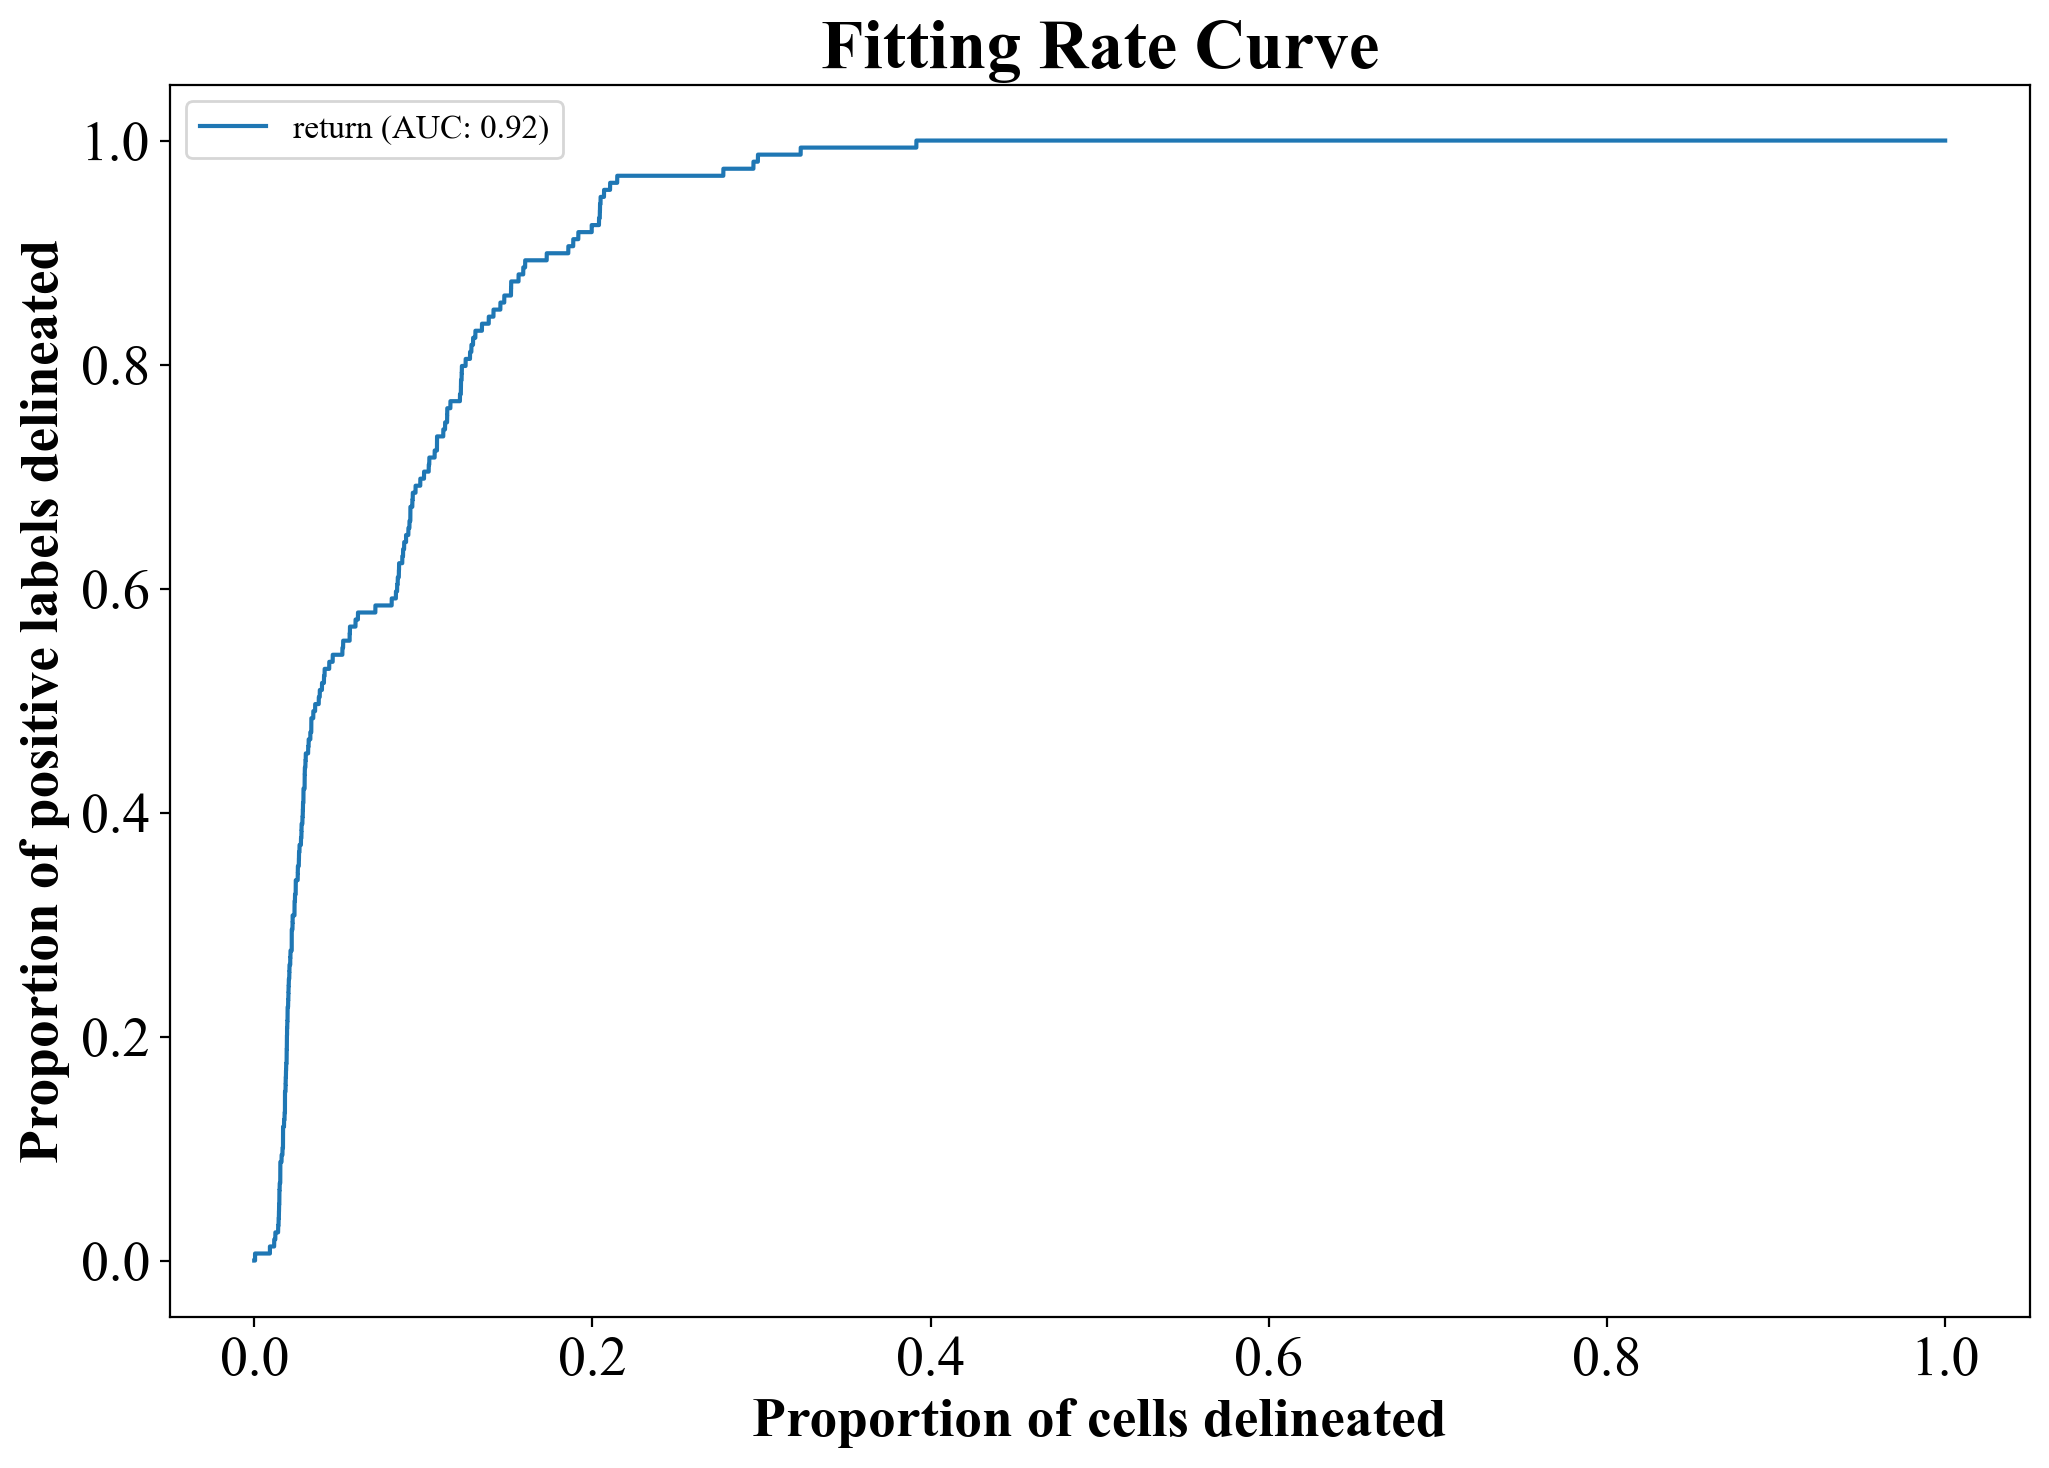

In [20]:
# for multiple predictive models


from scipy.integrate import trapz
import matplotlib.pyplot as plt



plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Times New Roman'




columns = ['return']
df = pd.DataFrame(frate)

plt.figure(figsize=(12, 8), dpi=200)


for col in columns:
    # Sort the DataFrame based on the current column
    df_sorted = df.sort_values(by=col, ascending=False)
    
    # Calculate the Area and Prediction
    df_sorted['Area'] = (df_sorted[col].rank(ascending=False) - 1) / (len(df_sorted) - 1)
    df_sorted['Prediction'] = df_sorted['Target'].cumsum() / df_sorted['Target'].sum()

    # Calculate the area under the curve
    area = trapz(df_sorted['Prediction'], df_sorted['Area'])

    # Plotting the curve for the current column with the area in the label
    plt.plot(df_sorted['Area'], df_sorted['Prediction'], label=f'{col} (AUC: {area:.2f})')



plt.xlabel('Proportion of cells delineated', fontsize=20, fontweight='bold')
plt.ylabel('Proportion of positive labels delineated', fontsize=20, fontweight='bold')
plt.title('Fitting Rate Curve', fontsize=25, fontweight='bold')
plt.legend(fontsize='large')
plt.tick_params(axis='both', which='major', labelsize=20)


# Display the plot
plt.show()



AUC of ROC of test labels 

In [21]:
FPRC = pd.DataFrame({'FPR': average_fpr})
TPRC=pd.DataFrame({'TPR': average_tpr})

ROCC=pd.DataFrame()
ROCC['FPR']=FPRC['FPR']
ROCC['TPR']=TPRC['TPR']


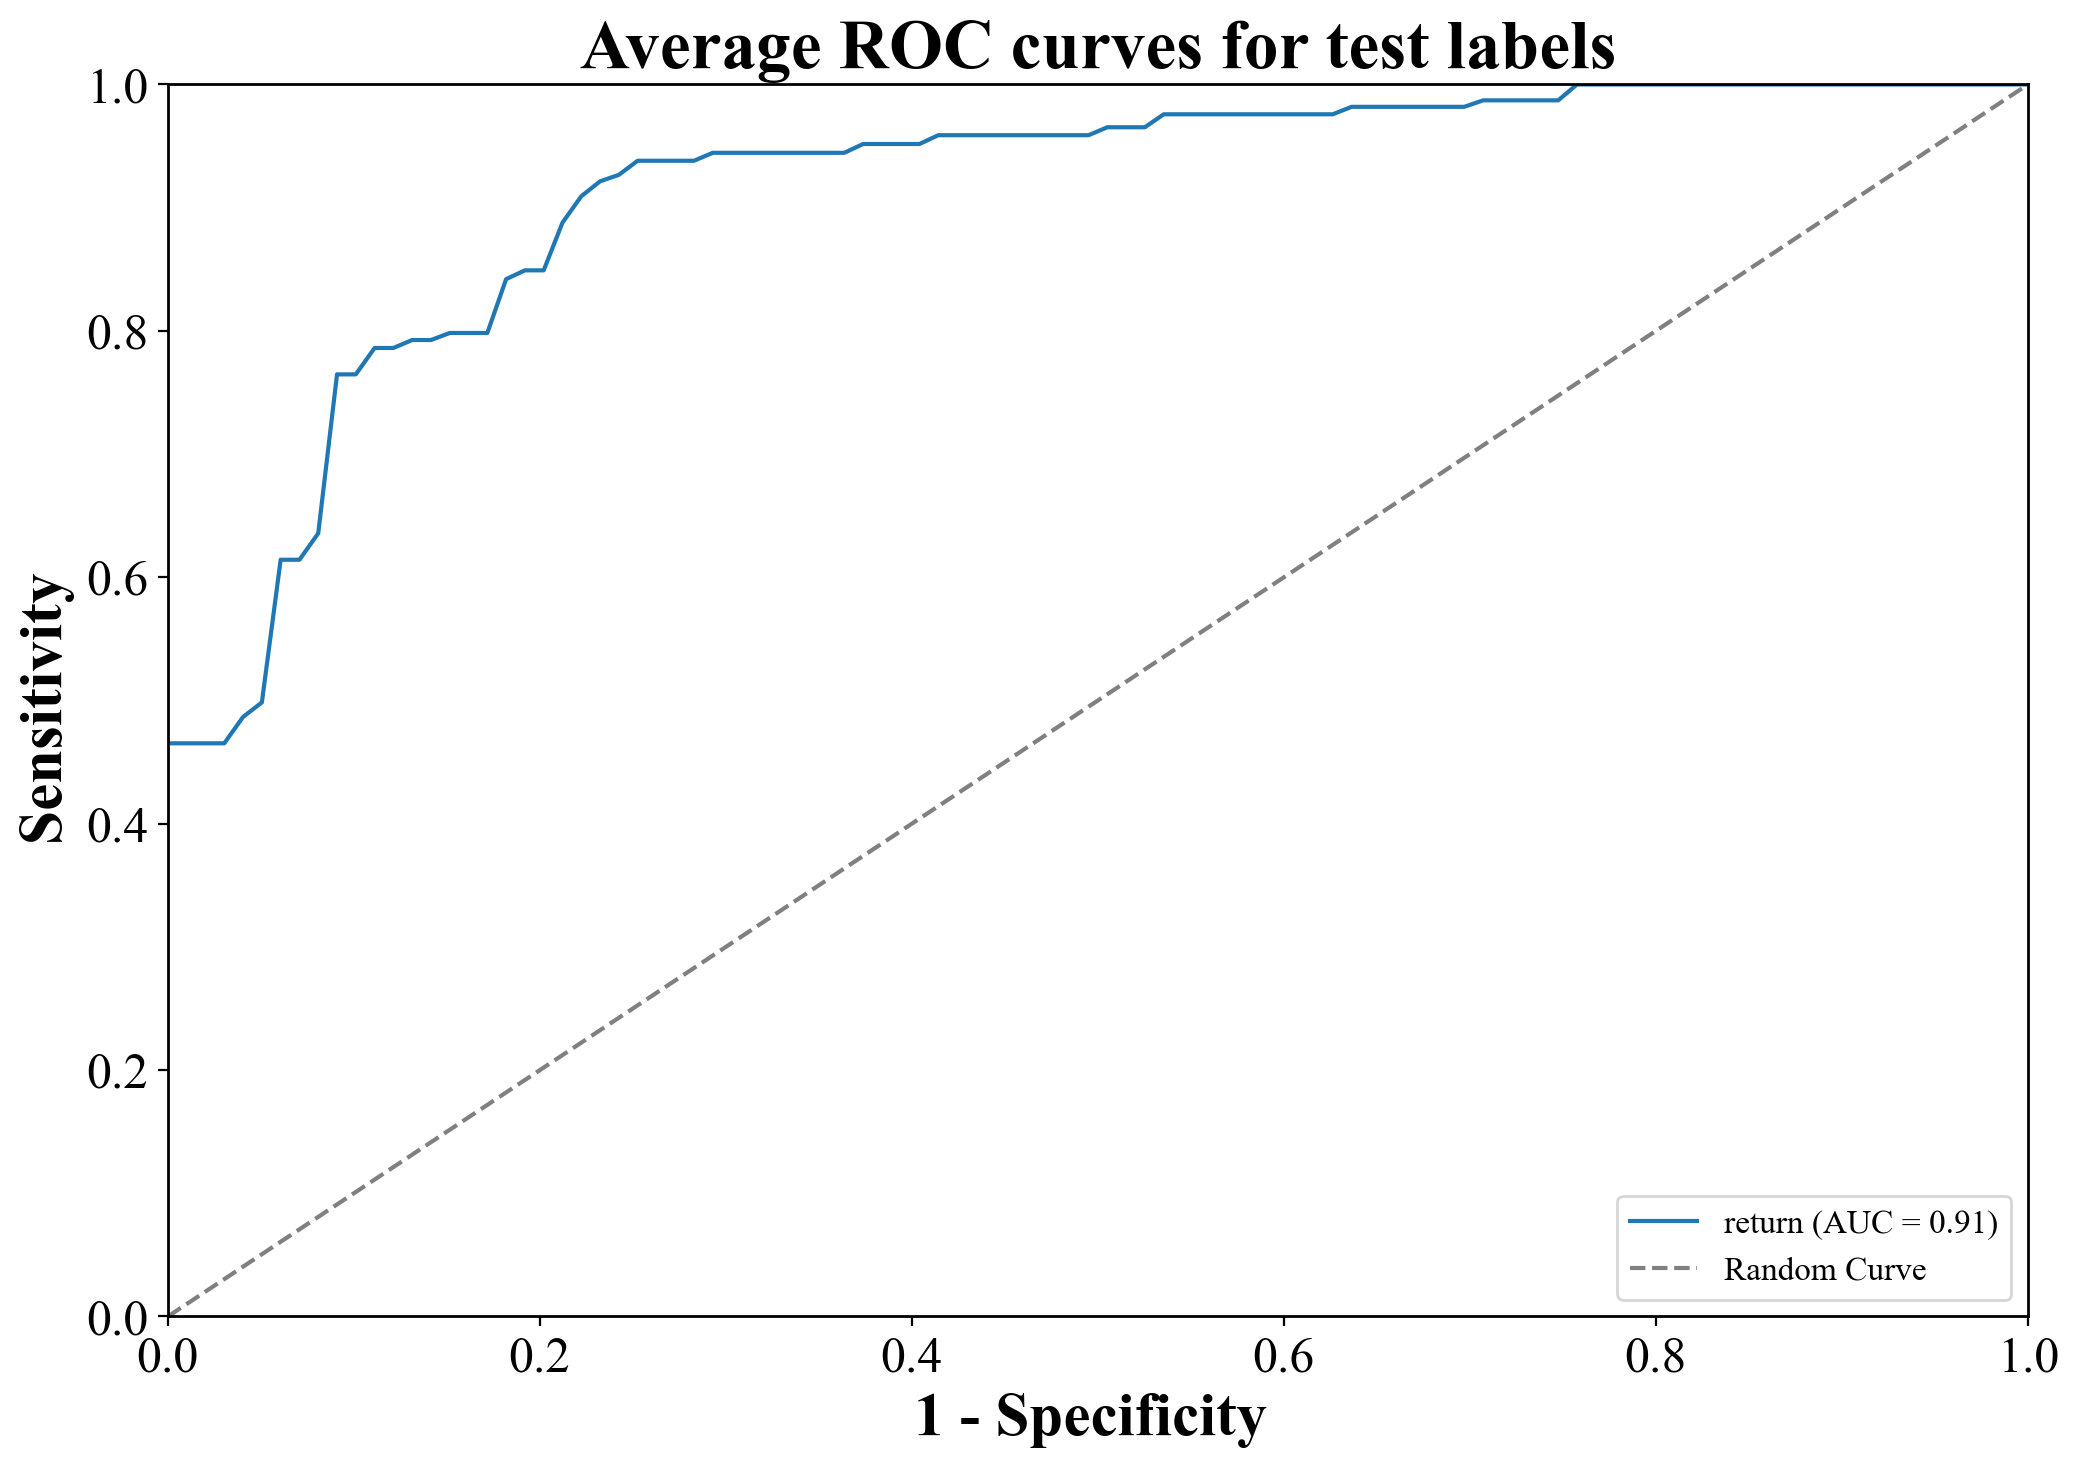

In [22]:
import numpy as np

# Define the pairs of columns and their corresponding titles
column_pairs = [(0, 1, 'return')]

# Create a single plot for all curves
plt.figure(figsize=(12, 8), dpi=200)
plt.title('Average ROC Curves for test data', fontsize=16)

# Initialize a list to store AUC values
auc_values = []

# Loop through pairs of columns and plot them
for col1, col2, title in column_pairs:
    x = ROCC.iloc[:, col1]  # Sensitivity
    y = ROCC.iloc[:, col2]  # Specificity

    # Calculate AUC using the trapezoidal rule (trapz)
    auc = np.trapz(y, x)
    auc_values.append(auc)



    # Plot and add AUC to the legend
    plt.plot(x, y, label=f'{title} (AUC = {auc:.2f})')



plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Curve')




# Adding labels, title, and legend with larger and bold font
plt.xlabel('1 - Specificity ', fontsize=22, fontweight='bold')
plt.ylabel('Sensitivity ', fontsize=22, fontweight='bold')
plt.title('Average ROC curves for test labels', fontsize=25, fontweight='bold')
plt.legend(fontsize='large')
plt.tick_params(axis='both', which='major', labelsize=18)
# Adjusting the axes to start from 0
plt.xlim(0, 1)
plt.ylim(0, 1)



# Making the borders thicker
for spine in plt.gca().spines.values():
    spine.set_linewidth(1)




# Show the plot
#plt.grid(True)
plt.show()